# Summary

- 1. Data processing
- 2. Data cleaning
- 3. Exploratory analysis and plots of relevant attributes
- 4. Feature selection
- 5. Models comparison

# 1. Data processing

1) bookID: A unique identification number for each book. 

2) title: The name under which the book was published. 


3) authors: The names of the authors of the book. Multiple authors are delimited by “/”. 

4) average_rating: The average rating of the book received in total. 

5) isbn: Another unique number to identify the book, known as the International Standard Book Number.

6) isbn13: A 13-digit ISBN to identify the book, instead of the standard 11-digit ISBN. 

7) language_code: Indicates the primary language of the book. For instance, “eng” is standard for English. 

8) num_pages: The number of pages the book contains.

9) ratings_count: The total number of ratings the book received. 

10) text_reviews_count: The total number of written text reviews the book received. 

11) publication_date: The date the book was published.

12) publisher: The name of the book publisher. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading CSV data in DataFrame
# Using warn parameter to see the issues
Books = pd.read_csv('books.csv', encoding='UTF-8', on_bad_lines='warn')

# Show the first 5 rows of the DataFrame to check
Books.head(5)

Skipping line 3350: expected 12 fields, saw 13
Skipping line 4704: expected 12 fields, saw 13
Skipping line 5879: expected 12 fields, saw 13
Skipping line 8981: expected 12 fields, saw 13



,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


4 lines are missing! They are skipped by the reader.

Try reading dates

In [3]:
# Changing date type from string to python date format
try:
    temp = Books.publication_date
    df_processed = Books.drop(columns=["publication_date"])
    df_processed = pd.concat([df_processed,pd.to_numeric(pd.to_datetime(temp, format='%m/%d/%Y'))],axis=1)
except:
  print("Date format error")

Date format error


# 2. Data cleaning

## File cleaning

In [4]:
# Loading the new CSV file books2.csv after manual repair of the errors in DataFrame (cf report)
data = pd.read_csv('books2.csv', encoding='UTF-8', on_bad_lines='warn')

# Show the first 5 rows of the DataFrame to check
data.head(5)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


There is no more remaining warning.

## Null testing

In [5]:
# Test null values
data.isna().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

There are no invalid values in the dataframe. It is clean.

## Dropping outliers

In [6]:
def finding_outliers(data_outliers, variable_name):
  iqr = data_outliers[variable_name].quantile(0.75) - data_outliers[variable_name].quantile(0.25)
  lower = data_outliers[variable_name].quantile(0.25) - 1.5 * iqr
  upper = data_outliers[variable_name].quantile(0.75) + 1.5 * iqr 
  return data_outliers[(data_outliers[variable_name] < lower) | (data_outliers[variable_name] > upper)]

In [7]:
finding_outliers(data, 'average_rating').sort_values('average_rating')

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
6383,24010,Laguna I Love You: The Best of Our Town,John Weld/Phil Interlandi,0.0,1564741575,9781564741578,eng,285,0,0,3/1/1996,Fithian Press
2533,9338,Insights: Talks On The Nature Of Existence,Frederick P. Lenz,0.0,1932206086,9781932206081,eng,304,0,0,1/1/2003,Frederick P. Lenz Foundation for American Budd...
2758,10200,Venac sonetnih venaca!! Puževa srma,Dobrica Erić,0.0,8644101277,9788644101277,srp,222,0,0,1/1/1996,Izdavačka agencija Draganić
3493,12712,Brodie's notes on Aldous Huxley's brave new world,Graham Handley,0.0,0333581296,9780333581292,eng,71,0,0,8/20/1992,Macmillan
4242,15186,American Film Guide,Frank N. Magill,0.0,0893562505,9780893562502,eng,5,0,0,1/1/1983,Salem Press Inc
...,...,...,...,...,...,...,...,...,...,...,...,...
624,2034,Comoediae 1: Acharenses/Equites/Nubes/Vespae/P...,Aristophanes/F.W. Hall/W.M. Geldart,5.0,0198145047,9780198145042,grc,364,0,0,2/22/1922,Oxford University Press USA
5650,20957,Colossians and Philemon: A Critical and Exeget...,R. McL. Wilson,5.0,0567044718,9780567044716,eng,512,1,0,12/7/2005,T&T Clark Int'l
10266,41639,Bill Gates: Computer Legend (Famous Lives),Sara Barton-Wood,5.0,0739844326,9780739844328,eng,48,0,0,11/1/2001,Raintree
8547,32823,Fanning the Flame: Bible Cross and Mission,Chris Green/Chris Wright/Paul Douglas Gardner,5.0,0310249872,9780310249870,eng,336,1,1,6/17/2003,Zondervan


In [8]:
# Dropping some incorrect values with average_rating=0 and average_rating=5
data = data.drop(finding_outliers(data, 'average_rating').index)

In [9]:
# Dropping some incorrect num_pages values with num_pages=1,2,3...,10 (corresponding to CD number in audiobooks)
data = data.drop(data[data['num_pages'] < 10].index)

<Axes: ylabel='average_rating'>

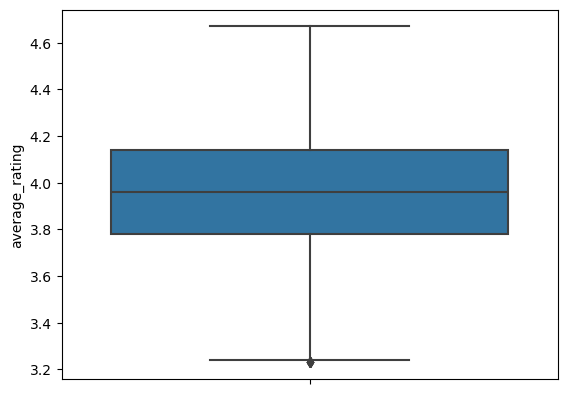

In [10]:
sns.boxplot(y = 'average_rating', data=data)

<Axes: ylabel='num_pages'>

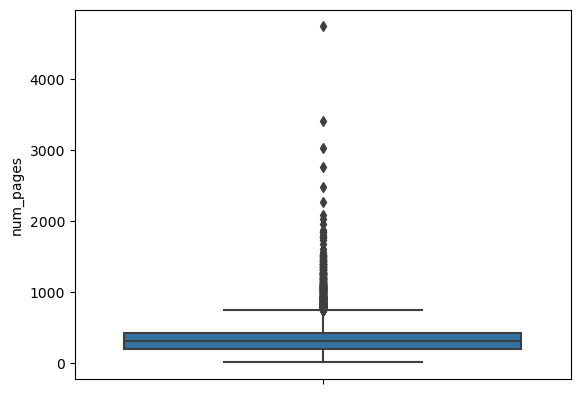

In [11]:
sns.boxplot(y = 'num_pages', data=data)

# 3. Exploratory analysis and plots of relevant attributes

- Look at the size
- find our target variable: average rating
- management of missing values: no missing values
- Visualization of the target variable
- Meaning of variables
- Relationship between variables and target

## Table caracteristics

In [12]:
# Get information on columns
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10693 entries, 0 to 11126
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              10693 non-null  int64  
 1   title               10693 non-null  object 
 2   authors             10693 non-null  object 
 3   average_rating      10693 non-null  float64
 4   isbn                10693 non-null  object 
 5   isbn13              10693 non-null  int64  
 6   language_code       10693 non-null  object 
 7   num_pages           10693 non-null  int64  
 8   ratings_count       10693 non-null  int64  
 9   text_reviews_count  10693 non-null  int64  
 10  publication_date    10693 non-null  object 
 11  publisher           10693 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.1+ MB


In [13]:
# Print lines and colums count
np.shape(data)

(10693, 12)

In [14]:
# Print columns titles
data.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', 'num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [15]:
# Print table caracteristics
data.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,10693.000000,10693.000000,1.069300e+04,10693.000000,1.069300e+04,10693.000000
mean,21264.750210,3.954457,9.759939e+12,342.597961,1.860887e+04,560.693538
std,13096.781613,0.261420,4.419068e+11,228.419456,1.146828e+05,2625.178164
min,1.000000,3.230000,8.987060e+09,10.000000,0.000000e+00,0.000000
25%,10206.000000,3.780000,9.780345e+12,202.000000,1.230000e+02,10.000000
50%,20174.000000,3.960000,9.780571e+12,304.000000,8.240000e+02,50.000000
75%,32078.000000,4.140000,9.780871e+12,419.000000,5.355000e+03,250.000000
max,45641.000000,4.670000,9.790008e+12,4736.000000,4.597666e+06,94265.000000


In [16]:
#Print data types
data.dtypes.value_counts()

object     6
int64      5
float64    1
Name: count, dtype: int64

In [17]:
data.tail()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
11122,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press
11123,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books
11124,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books
11125,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco
11126,45641,Las aventuras de Tom Sawyer,Mark Twain,3.91,8497646983,9788497646987,spa,272,113,12,5/28/2006,Edimat Libros


## Data normalization

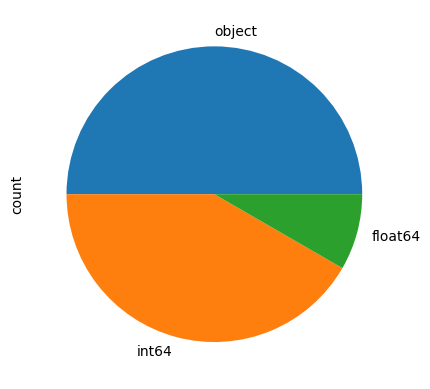

In [18]:
data.dtypes.value_counts().plot.pie();

In [19]:
dat_ch = data.select_dtypes('object')
dat_ch

,title,authors,isbn,language_code,publication_date,publisher
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,0439785960,eng,9/16/2006,Scholastic Inc.
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,0439358078,eng,9/1/2004,Scholastic Inc.
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,0439554896,eng,11/1/2003,Scholastic
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,043965548X,eng,5/1/2004,Scholastic Inc.
5,Unauthorized Harry Potter Book Seven News: Hal...,W. Frederick Zimmerman,0976540606,en-US,4/26/2005,Nimble Books
...,...,...,...,...,...,...
11122,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,1560254416,eng,12/21/2004,Da Capo Press
11123,You Bright and Risen Angels,William T. Vollmann,0140110879,eng,12/1/1988,Penguin Books
11124,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,0140131965,eng,8/1/1993,Penguin Books
11125,Poor People,William T. Vollmann,0060878827,eng,2/27/2007,Ecco


In order to be able to process date data, we convert it from string to numeric

In [20]:
# Changing date type from string to numeric
temp = data.publication_date
data = data.drop(columns=["publication_date"])
data = pd.concat([data,pd.to_numeric(pd.to_datetime(temp, format='%m/%d/%Y'))],axis=1)

In [21]:
dat_int = data.select_dtypes('int64')
# We drop every random generated colums that can't be useful in order to better see the colors on the graph
dat_int = dat_int.drop(columns=["bookID","isbn13"])
dat_int

,num_pages,ratings_count,text_reviews_count,publication_date
0,652,2095690,27591,1158364800000000000
1,870,2153167,29221,1093996800000000000
2,352,6333,244,1067644800000000000
3,435,2339585,36325,1083369600000000000
5,152,19,1,1114473600000000000
...,...,...,...,...
11122,512,156,20,1103587200000000000
11123,635,783,56,596937600000000000
11124,415,820,95,744163200000000000
11125,434,769,139,1172534400000000000


In [22]:
dat_float = data.select_dtypes('float')
dat_float

,average_rating
0,4.57
1,4.49
2,4.42
3,4.56
5,3.74
...,...
11122,4.06
11123,4.08
11124,3.96
11125,3.72


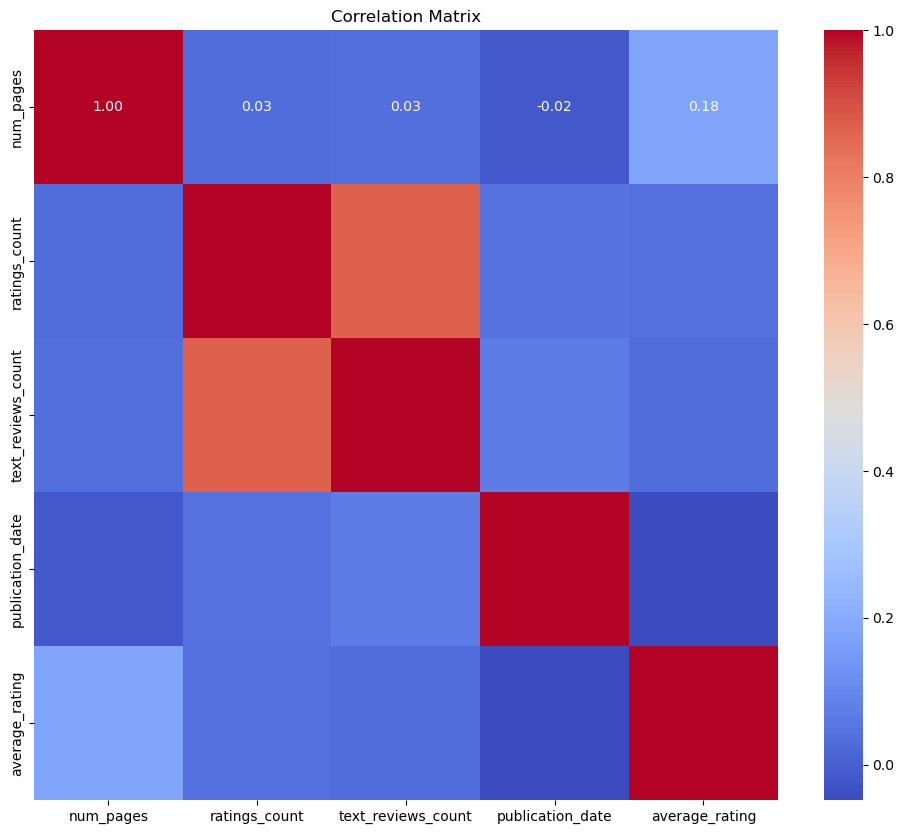

In [23]:
dat_int_float = pd.concat([dat_int, dat_float], axis=1) #data.select_dtypes('int64','float')
correlation_matrix = dat_int_float.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

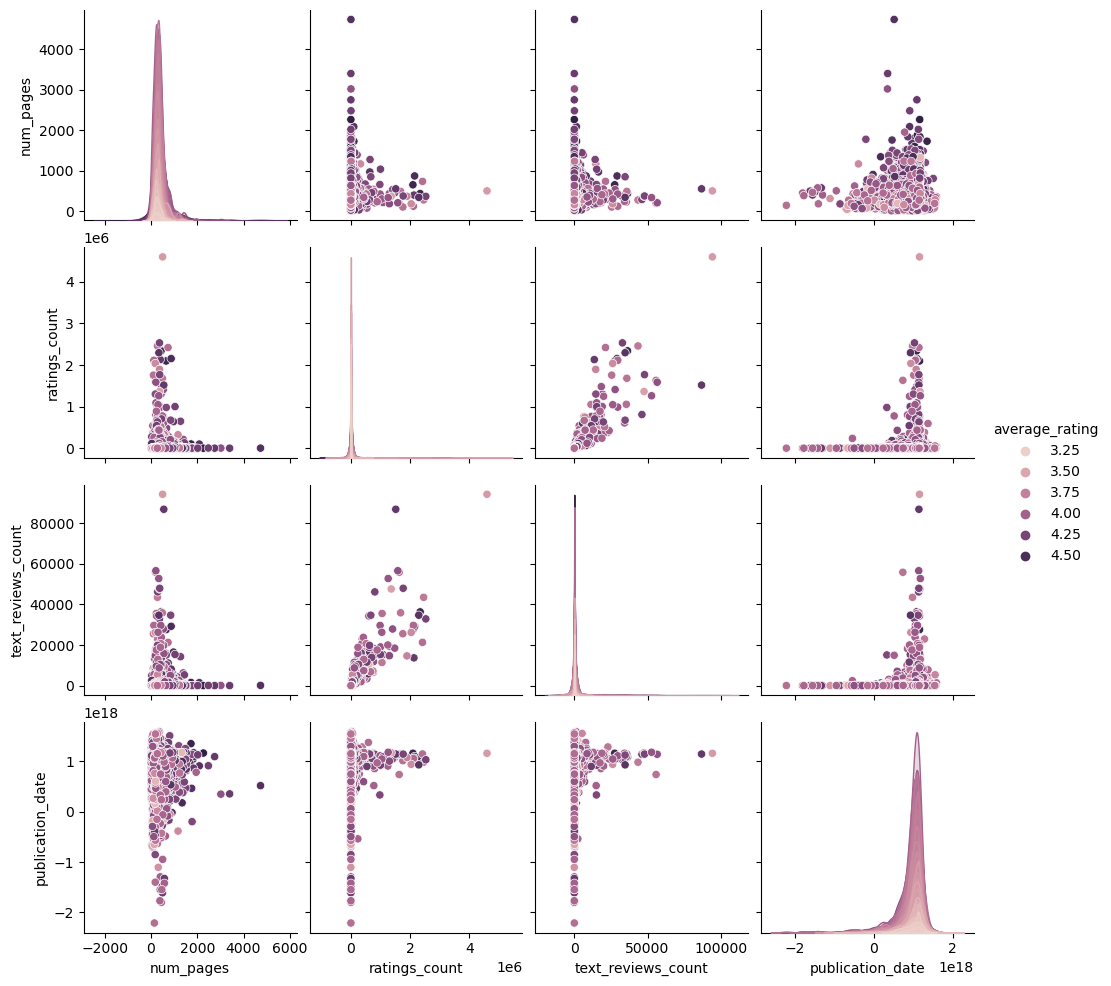

In [24]:
sns.pairplot(pd.concat([dat_int, dat_float], axis=1), hue='average_rating')

<Axes: xlabel='num_pages', ylabel='average_rating'>

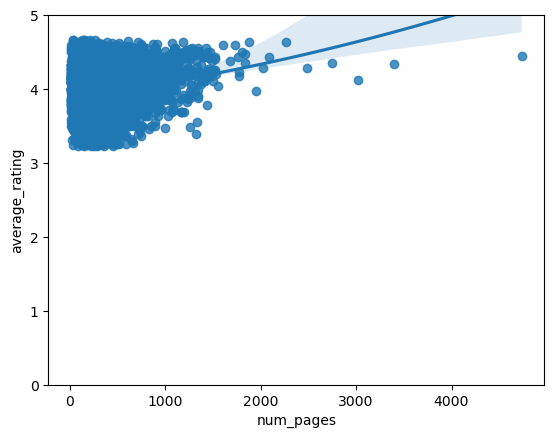

In [25]:
plt.ylim(0, 5)
sns.regplot(data=data, x="num_pages", y="average_rating", order=2)

<Axes: xlabel='ratings_count', ylabel='average_rating'>

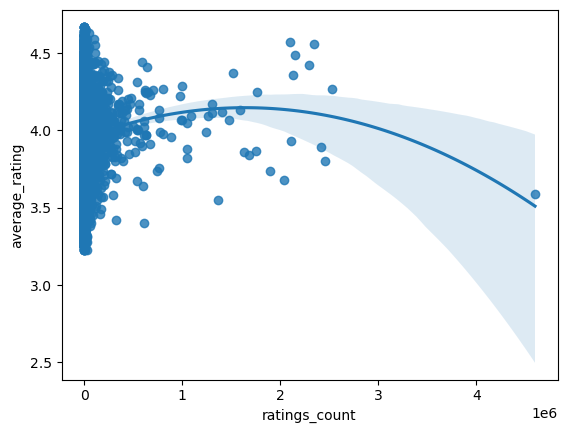

In [26]:
sns.regplot(data=data, x="ratings_count", y="average_rating", order=2)

<Axes: xlabel='text_reviews_count', ylabel='average_rating'>

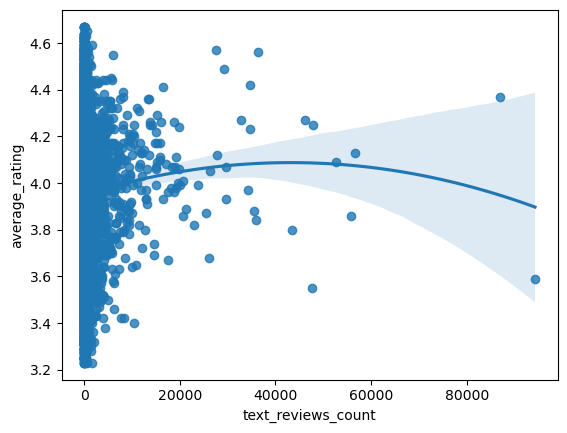

In [27]:
sns.regplot(data=data, x="text_reviews_count", y="average_rating", order=2)

<Axes: xlabel='publication_date', ylabel='average_rating'>

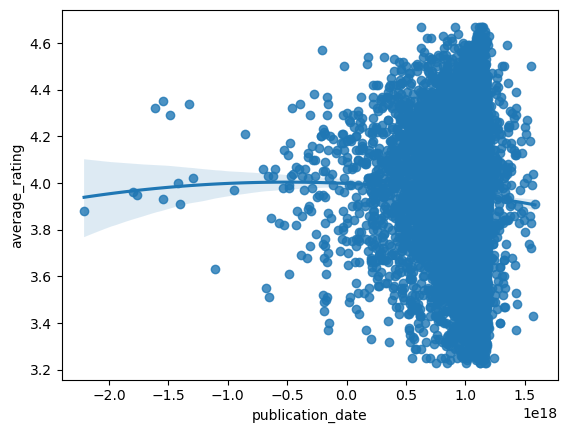

In [28]:
sns.regplot(data=data, x="publication_date", y="average_rating", order=2)

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 640x480 with 0 Axes>

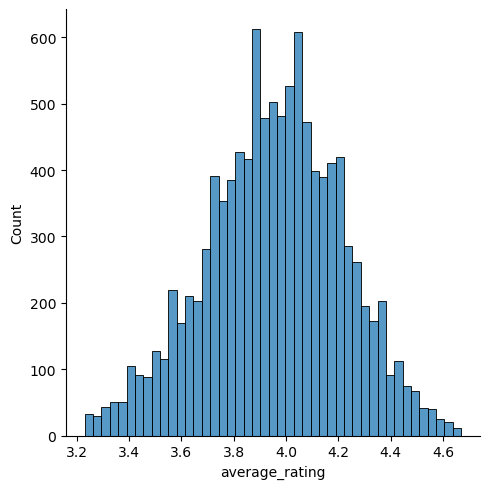

In [29]:
for col in data.select_dtypes('float'):
    plt.figure()
    sns.displot(data[col])

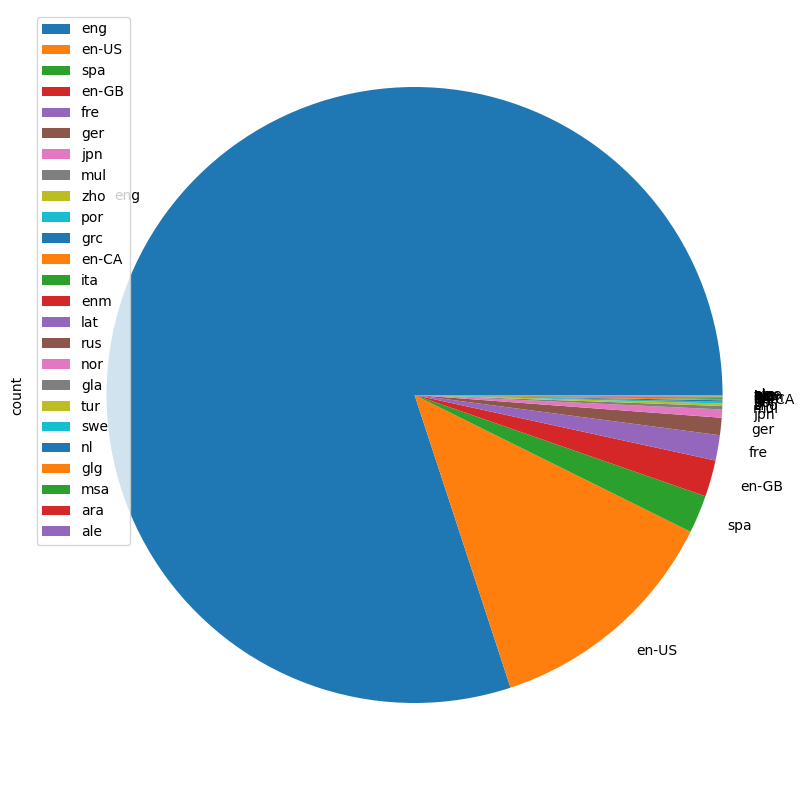

In [69]:
data['language_code'].value_counts().plot(kind = 'pie', figsize=(10, 10)).legend()
plt.show()

We can keep English and bring the other languages together to study the impact of the English language on the rating of books.
Here we choose to keep all the languages because it is an interesting variable which allows us to train the algorithm.

# 4. Feature selection

## Quantitative variables

Dropping every qualitative and random colums

In [30]:
df_processed = data.drop(columns=["bookID","authors","title","isbn","isbn13","language_code","publisher"])

In [31]:
from sklearn.model_selection import train_test_split
# split 80% of the data to the training set and 20% of the data to test set
df_train, df_test = train_test_split(df_processed,test_size = 0.2)

In [32]:
print("Total lines=",len(df_processed),", train lines=",len(df_train),", test lines=",len(df_test))

Total lines= 10693 , train lines= 8554 , test lines= 2139


In [33]:
df_train

,average_rating,num_pages,ratings_count,text_reviews_count,publication_date
905,4.05,508,2871,209,975369600000000000
5330,3.82,688,421,40,732326400000000000
10354,3.96,549,22812,791,1014940800000000000
9805,3.50,78,6,1,883526400000000000
795,3.77,512,14228,668,1041292800000000000
...,...,...,...,...,...
8281,4.10,704,288,3,944611200000000000
3763,4.28,192,4059,50,1106611200000000000
1488,3.73,244,19366,645,909878400000000000
8510,3.64,255,3551,33,500601600000000000


In [34]:
# Sample distribution test
print(df_processed['num_pages'].mean())
print(df_train['num_pages'].mean())
print(df_test['num_pages'].mean())

342.5979612830824
342.4713584288052
343.10425432445066


In [35]:
print(df_processed['average_rating'].mean())
print(df_train['average_rating'].mean())
print(df_test['average_rating'].mean())

3.9544571214813433
3.9552735562310026
3.951192145862552


In [36]:
df_train.columns

Index(['average_rating', 'num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date'],
      dtype='object')

In [37]:
# Prepare train model values
X_train = df_train.loc[:,['num_pages', 'ratings_count', 'text_reviews_count','publication_date']].values
y_train = df_train.average_rating.values

In [38]:
X_train

array([[                508,                2871,                 209,
         975369600000000000],
       [                688,                 421,                  40,
         732326400000000000],
       [                549,               22812,                 791,
        1014940800000000000],
       ...,
       [                244,               19366,                 645,
         909878400000000000],
       [                255,                3551,                  33,
         500601600000000000],
       [                192,                  47,                   1,
        1011916800000000000]], dtype=int64)

In [39]:
# Prepare test model values
X_test = df_test.loc[:,['num_pages', 'ratings_count', 'text_reviews_count','publication_date']].values
y_test = df_test.average_rating.values

In [40]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X=X_train, y=y_train)

y_test_predicted = lr_model.predict(X_test)

Comparison between real values of average_rating and predicted values

In [41]:
Comparison = pd.DataFrame({'Real': y_test.tolist(), 'Predicted': y_test_predicted.tolist()})
Comparison['difference'] = Comparison['Real'] - Comparison['Predicted']
print(Comparison.head(15))

    Real  Predicted  difference
0   4.16   3.926380    0.233620
1   3.53   3.884782   -0.354782
2   3.76   3.947535   -0.187535
3   4.30   3.979047    0.320953
4   3.65   3.922270   -0.272270
5   3.54   3.921041   -0.381041
6   4.32   4.010687    0.309313
7   3.90   4.079662   -0.179662
8   3.97   3.955178    0.014822
9   4.08   3.939417    0.140583
10  3.90   3.933179   -0.033179
11  4.29   4.019722    0.270278
12  3.54   3.910106   -0.370106
13  4.35   3.922454    0.427546
14  4.10   3.970418    0.129582


Statistical measurements

In [42]:
from sklearn.metrics import r2_score,mean_squared_error
mse = mean_squared_error(y_test, y_test_predicted)
print("Mean Squared Error:", mse,",R²=",r2_score(y_test, y_test_predicted))

Mean Squared Error: 0.06440275632143355 ,R²= 0.03410672287927963



## Qualitative variables

Adding qualitative variable to the model

In [43]:
from sklearn.model_selection import train_test_split
df_processed2 = data.drop(columns=["bookID","title","isbn","isbn13"])

Droping publisher column that is harder to process because there are many duplicates publisher with different names like "Avery" and "Avery Publishing Group"

In [44]:
df_processed2 = df_processed2.drop(columns=["publisher"])

In [45]:
# Encoding language column
df_processed2 = pd.concat([df_processed2,pd.get_dummies(df_processed2.language_code)],axis=1).drop(columns="language_code")
df_processed2

,authors,average_rating,num_pages,ratings_count,text_reviews_count,publication_date,ale,ara,en-CA,en-GB,...,msa,mul,nl,nor,por,rus,spa,swe,tur,zho
0,J.K. Rowling/Mary GrandPré,4.57,652,2095690,27591,1158364800000000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,J.K. Rowling/Mary GrandPré,4.49,870,2153167,29221,1093996800000000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,J.K. Rowling,4.42,352,6333,244,1067644800000000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,J.K. Rowling/Mary GrandPré,4.56,435,2339585,36325,1083369600000000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,W. Frederick Zimmerman,3.74,152,19,1,1114473600000000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11122,William T. Vollmann/Larry McCaffery/Michael He...,4.06,512,156,20,1103587200000000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11123,William T. Vollmann,4.08,635,783,56,596937600000000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11124,William T. Vollmann,3.96,415,820,95,744163200000000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11125,William T. Vollmann,3.72,434,769,139,1172534400000000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Encoding authors column

In [46]:
def trad_from_authors(authors):
    return authors.split("/")[0]

In [47]:
temp = df_processed2.authors
df_processed2 = df_processed2.drop(columns=["authors"])
df_processed2 = pd.concat([df_processed2,temp.apply(trad_from_authors)],axis=1)
df_processed2.rename(columns = {'authors':'FirstAuthor'},inplace = True)

df_processed2 = pd.concat([df_processed2,pd.get_dummies(df_processed2.FirstAuthor)],axis=1)
df_processed2

df_processed2 = df_processed2.drop(columns=["FirstAuthor"])

In [48]:
df_train, df_test = train_test_split(df_processed2,test_size = 0.2)

In [49]:
print("Total lines=",len(df_processed2),", train lines=",len(df_train),", test lines=",len(df_test))

Total lines= 10693 , train lines= 8554 , test lines= 2139


In [50]:
df_train

,average_rating,num_pages,ratings_count,text_reviews_count,publication_date,ale,ara,en-CA,en-GB,en-US,...,Zak Smith,Zecharia Sitchin,Zilpha Keatley Snyder,Zolar,Zora Neale Hurston,Zoë Heller,bell hooks,Åsne Seierstad,Émile Zola,Éric-Emmanuel Schmitt
7624,4.22,368,654,43,1036454400000000000,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2004,4.09,848,11330,1011,1093910400000000000,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
6384,4.00,163,46,0,1161993600000000000,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10713,3.96,400,562,37,1170720000000000000,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2376,4.03,445,24792,1139,991094400000000000,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7742,3.88,218,6467,245,998265600000000000,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9271,3.96,208,306,35,823478400000000000,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4699,4.06,188,13736,189,1104537600000000000,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10934,4.13,255,15,0,1172707200000000000,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [51]:
print(df_processed2.average_rating.mean())
print(df_train.average_rating.mean())
print(df_test.average_rating.mean())

3.9544571214813433
3.9522889876081364
3.96312762973352


In [52]:
print(df_processed2.eng.mean())
print(df_train.eng.mean())
print(df_test.eng.mean())


0.8004301879734406
0.8011456628477905
0.7975689574567555


In [53]:
df_train.columns

Index(['average_rating', 'num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'ale', 'ara', 'en-CA', 'en-GB', 'en-US',
       ...
       'Zak Smith', 'Zecharia Sitchin', 'Zilpha Keatley Snyder', 'Zolar',
       'Zora Neale Hurston', 'Zoë Heller', 'bell hooks', 'Åsne Seierstad',
       'Émile Zola', 'Éric-Emmanuel Schmitt'],
      dtype='object', length=4115)

In [54]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8554 entries, 7624 to 1623
Columns: 4115 entries, average_rating to Éric-Emmanuel Schmitt
dtypes: bool(4110), float64(1), int64(4)
memory usage: 33.9 MB


In [55]:
y_train = df_train.average_rating

df_train = df_train.drop(columns=["average_rating"])
X_train = df_train.values

In [56]:
df_train

,num_pages,ratings_count,text_reviews_count,publication_date,ale,ara,en-CA,en-GB,en-US,eng,...,Zak Smith,Zecharia Sitchin,Zilpha Keatley Snyder,Zolar,Zora Neale Hurston,Zoë Heller,bell hooks,Åsne Seierstad,Émile Zola,Éric-Emmanuel Schmitt
7624,368,654,43,1036454400000000000,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2004,848,11330,1011,1093910400000000000,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
6384,163,46,0,1161993600000000000,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
10713,400,562,37,1170720000000000000,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2376,445,24792,1139,991094400000000000,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7742,218,6467,245,998265600000000000,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
9271,208,306,35,823478400000000000,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4699,188,13736,189,1104537600000000000,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
10934,255,15,0,1172707200000000000,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [57]:
y_test = df_test.average_rating

df_test = df_test.drop(columns=["average_rating"])
X_test = df_test.values

In [58]:
# Training the LinearRegression model
from sklearn.linear_model import LinearRegression

# here we initialize the model
lr_model = LinearRegression().fit(X_train, y_train)

y_test_predicted = lr_model.predict(X_test)

In [59]:
Comparison = pd.DataFrame({'Real': y_test.tolist(), 'Predicted': y_test_predicted.tolist()})
Comparison['difference'] = Comparison['Real'] - Comparison['Predicted']
print(Comparison.head(15))

from sklearn.metrics import r2_score,mean_squared_error
mse = mean_squared_error(y_test, y_test_predicted)
print("Mean Squared Error:", mse,",R²=",r2_score(y_test, y_test_predicted))

    Real  Predicted  difference
0   3.77   3.927835   -0.157835
1   3.99   3.956820    0.033180
2   3.98   3.969128    0.010872
3   4.09   3.993193    0.096807
4   3.67   3.932029   -0.262029
5   3.90   3.912103   -0.012103
6   3.96   4.026890   -0.066890
7   3.97   3.982808   -0.012808
8   3.73   3.935130   -0.205130
9   4.17   3.965037    0.204963
10  4.10   3.942478    0.157522
11  4.05   3.938886    0.111114
12  4.03   3.960013    0.069987
13  4.07   3.914502    0.155498
14  3.62   3.928592   -0.308592
Mean Squared Error: 0.0685218644499611 ,R²= 0.024902360648366484


# 5. Models comparison

In [60]:
# Training the GradientBoostingRegressor model
from sklearn.ensemble import GradientBoostingRegressor

lr_model = GradientBoostingRegressor(random_state=0)
lr_model.fit(X_train, y_train)

GBR_y_test_predicted = lr_model.predict(X_test)

In [61]:
Comparison = pd.DataFrame({'Real': y_test.tolist(), 'Predicted': GBR_y_test_predicted.tolist()})
Comparison['difference'] = Comparison['Real'] - Comparison['Predicted']
print(Comparison.head(15))

mse = mean_squared_error(y_test, GBR_y_test_predicted)
print("Mean Squared Error:", mse,",R²=",r2_score(y_test, GBR_y_test_predicted))

    Real  Predicted  difference
0   3.77   3.904603   -0.134603
1   3.99   3.940764    0.049236
2   3.98   3.935815    0.044185
3   4.09   4.005035    0.084965
4   3.67   3.865860   -0.195860
5   3.90   3.923101   -0.023101
6   3.96   4.076283   -0.116283
7   3.97   3.974075   -0.004075
8   3.73   3.912541   -0.182541
9   4.17   3.951007    0.218993
10  4.10   3.925457    0.174543
11  4.05   3.898037    0.151963
12  4.03   3.922947    0.107053
13  4.07   3.932522    0.137478
14  3.62   3.663721   -0.043721
Mean Squared Error: 0.06036940510948817 ,R²= 0.14091560578723017


In [62]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=10, random_state=42)
rf.fit(X_train, y_train)

RFR_y_test_predicted = rf.predict(X_test)

In [63]:
Comparison = pd.DataFrame({'Real': y_test.tolist(), 'Predicted': RFR_y_test_predicted.tolist()})
Comparison['difference'] = Comparison['Real'] - Comparison['Predicted']
print(Comparison.head(15))

mse = mean_squared_error(y_test, RFR_y_test_predicted)
print("Mean Squared Error:", mse,",R²=",r2_score(y_test, RFR_y_test_predicted))

    Real  Predicted  difference
0   3.77      3.853      -0.083
1   3.99      4.102      -0.112
2   3.98      3.938       0.042
3   4.09      4.094      -0.004
4   3.67      3.949      -0.279
5   3.90      3.802       0.098
6   3.96      4.212      -0.252
7   3.97      3.988      -0.018
8   3.73      3.828      -0.098
9   4.17      3.933       0.237
10  4.10      3.959       0.141
11  4.05      3.917       0.133
12  4.03      3.937       0.093
13  4.07      3.978       0.092
14  3.62      3.664      -0.044
Mean Squared Error: 0.05859136699392239 ,R²= 0.16621790576232098


In [64]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNR_y_test_predicted = knn.predict(X_test)

In [65]:
Comparison = pd.DataFrame({'Real': y_test.tolist(), 'Predicted': KNR_y_test_predicted.tolist()})
Comparison['difference'] = Comparison['Real'] - Comparison['Predicted']
print(print(Comparison.head(15)))

mse = mean_squared_error(y_test, KNR_y_test_predicted)
print("Mean Squared Error:", mse,",R²=",r2_score(y_test, KNR_y_test_predicted))

    Real  Predicted  difference
0   3.77      4.068      -0.298
1   3.99      3.998      -0.008
2   3.98      4.066      -0.086
3   4.09      3.940       0.150
4   3.67      3.852      -0.182
5   3.90      3.884       0.016
6   3.96      4.030      -0.070
7   3.97      3.998      -0.028
8   3.73      3.866      -0.136
9   4.17      3.882       0.288
10  4.10      4.050       0.050
11  4.05      3.834       0.216
12  4.03      3.810       0.220
13  4.07      4.012       0.058
14  3.62      4.004      -0.384
None
Mean Squared Error: 0.08149090042075736 ,R²= -0.15965298473376044
